import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

%matplotlib notebook

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)

(506, 13)


<IPython.core.display.Javascript object>


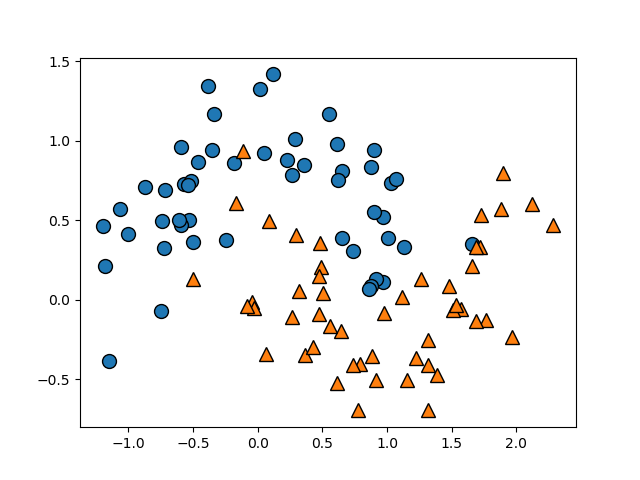

In [3]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

plt.close()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

None

<IPython.core.display.Javascript object>


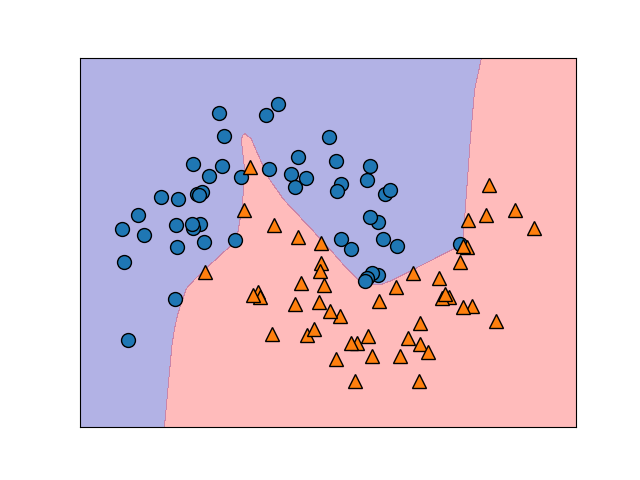

In [4]:
from sklearn.neural_network import MLPClassifier
plt.close()

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X, y)
mglearn.plots.plot_2d_separator(mlp, X, fill=True, alpha=.3)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [5]:
linear_data = np.array([
    [0, 1],
    [2, 1.7],
    [8, 3],
    [9, 3.1],
    [10, 3.8]
])

In [6]:
X = linear_data[:, 0:1]
y = linear_data[:, 1]

In [7]:
X

array([[  0.],
       [  2.],
       [  8.],
       [  9.],
       [ 10.]])

In [9]:
y

array([ 1. ,  1.7,  3. ,  3.1,  3.8])

<IPython.core.display.Javascript object>


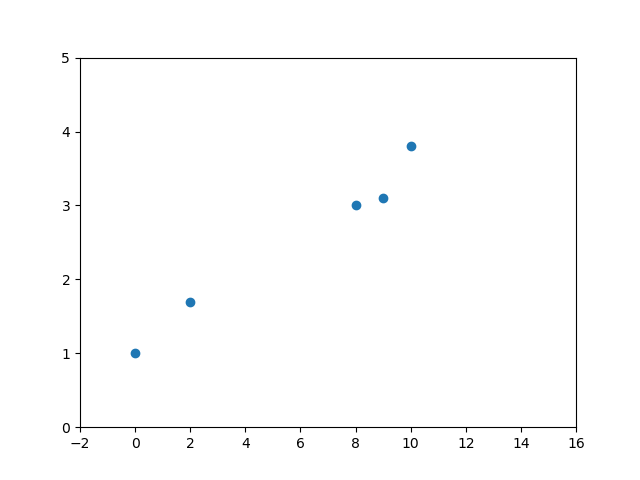

(0, 5)

In [11]:
plt.close()

plt.scatter(X[:, 0], y)
plt.gca().set_xlim(-2, 16)
plt.gca().set_ylim(0, 5)

In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
model.coef_, model.intercept_

(array([ 0.25024752]), 1.0685643564356446)

<IPython.core.display.Javascript object>


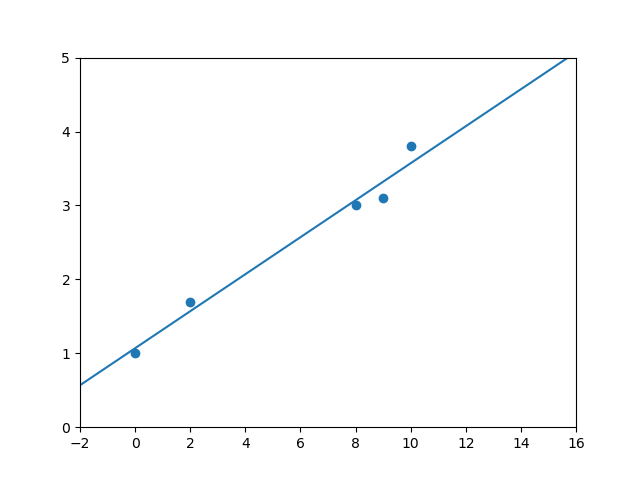

(0, 5)

In [14]:
interval = np.linspace(-2, 16)
result = interval * model.coef_[0] + model.intercept_

plt.close()
plt.scatter(X[:, 0], y)
plt.plot(interval, result)
plt.gca().set_xlim(-2, 16)
plt.gca().set_ylim(0, 5)

In [15]:
model.score(X, y)

0.97532863348015619

In [16]:
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print("Training score: {:.2f}".format(model.score(X_train, y_train)))
print("Test score:     {:.2f}".format(model.score(X_test, y_test)))

Training score: 0.67
Test score:     0.66


In [17]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model = LinearRegression().fit(X_train, y_train)

print("Training score: {:.2f}".format(model.score(X_train, y_train)))
print("Test score:     {:.2f}".format(model.score(X_test, y_test)))

Training score: 0.95
Test score:     0.61


In [23]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=0.01).fit(X_train, y_train)

print("Training score: {:.2f}".format(model.score(X_train, y_train)))
print("Test score:     {:.2f}".format(model.score(X_test, y_test)))

Training score: 0.94
Test score:     0.70


In [31]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)

print("Training score: {:.2f}".format(model.score(X_train, y_train)))
print("Test score:     {:.2f}".format(model.score(X_test, y_test)))
print("Features used:  {}/{}".format(np.sum(model.coef_ != 0), np.shape(X_train)[1]))

Training score: 0.90
Test score:     0.77
Features used:  33/104
